In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [2]:
# Load data from https://www.openml.org/d/554
X, Y = fetch_openml('mnist_784', return_X_y=True)

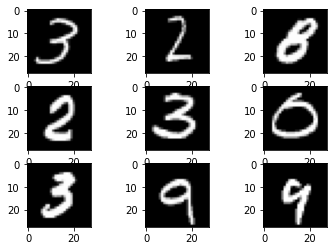

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y.astype(int), test_size=0.25, random_state=42)
plt.figure()
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape((28,28)),cmap='gray')
plt.show()

scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = 0)

# Train model
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
train_accuracy = accuracy_score(Y_train, rf.predict(X_train))
test_accuracy = accuracy_score(Y_test, rf.predict(X_test))

In [ ]:
print(train_accuracy)
print(test_accuracy)

0.9992380952380953
0.9424


In [ ]:
clf = RandomForestClassifier(n_jobs = 8)
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 8, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
clf = RandomForestClassifier(n_jobs = -1)
cv_score = cross_val_score(clf, X_train, Y_train, cv=10)
print(cv_score)

[0.96819048 0.968      0.96857143 0.96742857 0.97085714 0.97009524
 0.96514286 0.96819048 0.964      0.96990476]


In [62]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of features
max_features = ["sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [13]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 12.9min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [14]:
print(rf_random.best_params_)

{'n_estimators': 2000, 'max_features': 'sqrt', 'max_depth': 60}


In [16]:
test_accuracy = accuracy_score(Y_test, rf_random.predict(X_test))
print(test_accuracy)

0.9684


In [79]:
train = xgb.DMatrix(X_train, label=Y_train)
test = xgb.DMatrix(X_test, label=Y_test)

In [ ]:
model = xgb.train(param, train)
predictions = model.predict(test)

In [61]:
accuracy_score(Y_test, predictions)

0.9406285714285715

In [108]:
eta = np.linspace(start = 0.3, stop = 0.1, num = 5)
max_depth = [int(x) for x in np.linspace(start = 5, stop = 10, num = 6)]

set_params = {
    'num_class' : 10,
    'objective' : 'multi:softmax',
    'tree_method' : 'gpu_hist'
}

random_params = {
    'eta' : eta,
    'max_depth' : max_depth
}

In [111]:
xgb_model = xgb.XGBClassifier(objective = 'multi:softmax', num_class = 10, tree_method = 'gpu_hist')
xgb_random = RandomizedSearchCV(xgb_model, param_distributions = random_params, random_state = 42)

In [ ]:
xgb_random.fit(X_train, Y_train)

C:\Users\djadi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:16:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [ ]:
print(xgb_random.best_params_)
test_accuracy = accuracy_score(Y_test, xgb_random.predict(X_test))
print(test_accuracy)